In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install xlrd==2.0.1


In [3]:
import xlrd
print(f"xlrd version: {xlrd.__version__}")


xlrd version: 2.0.1


In [4]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
# Removed shap import as per the user's request
import pyarrow

# Define the path to your Excel file
file_path = 'Annual change in the number of residences by type of activity and by municipality size class.xls'

# Load the Excel file
# Note: 'xlrd' engine supports only .xls files. Ensure your file is in .xls format.
excel_file = pd.ExcelFile(file_path, engine='xlrd')

# Retrieve the list of sheet names
sheet_names = excel_file.sheet_names
print(f"Available Sheets: {sheet_names}")

# Dictionary to store cleaned DataFrames keyed by sheet name
cleaned_data = {}

def combine_header_rows(df, header_start=0, header_end=9, join_separator=''):
    """
    Combines multiple header rows into a single header by concatenating the text.

    Parameters:
    - df: pandas DataFrame read without headers.
    - header_start: Starting row index for headers (inclusive).
    - header_end: Ending row index for headers (exclusive).
    - join_separator: Separator to use when joining header strings.

    Returns:
    - df_cleaned: DataFrame with combined headers and header rows removed.
    - combined_headers: List of combined header strings.
    """
    # Extract header rows
    header_data = df.iloc[header_start:header_end].fillna('')  # Replace NaN with empty strings
    
    # Combine header rows for each column by concatenating non-empty strings
    combined_headers = header_data.apply(
        lambda x: join_separator.join([str(item).strip() for item in x if str(item).strip() != '']),
        axis=0
    )
    
    # Assign combined headers to the DataFrame
    df.columns = combined_headers
    
    # Remove the header rows from the DataFrame
    df_cleaned = df.iloc[header_end:].reset_index(drop=True)
    
    return df_cleaned, combined_headers.tolist()

# Iterate over each sheet
for sheet in sheet_names:
    print(f"\nProcessing Sheet: {sheet}")
    
    # Read the sheet without headers
    df = pd.read_excel(file_path, sheet_name=sheet, header=None, engine='xlrd')
    
    # Combine header rows (rows 0 through 8) into a single header
    df_cleaned, combined_headers = combine_header_rows(df, header_start=0, header_end=9, join_separator='')
    
    # Display combined headers for verification
    print("Combined Headers:")
    for idx, header in enumerate(combined_headers):
        print(f"Column {idx}: '{header}'")
    
    # Remove columns where the combined header is empty
    # This handles any columns that were entirely empty in header rows
    non_empty_columns = [col for col in df_cleaned.columns if col.strip() != '']
    df_cleaned = df_cleaned[non_empty_columns]
    
    # Reset index after removing columns
    df_cleaned.reset_index(drop=True, inplace=True)
    
    # Drop any rows that are completely NaN
    df_cleaned.dropna(how='all', inplace=True)
    
    # Reset index after dropping rows
    df_cleaned.reset_index(drop=True, inplace=True)
    
    # Remove footer/metadata rows if known (e.g., last 3 rows)
    # Adjust the number based on your data
    # Here, assuming last 3 rows are metadata
    if df_cleaned.shape[0] > 3:
        df_cleaned = df_cleaned.iloc[:-3]  # Remove last 3 rows
    else:
        print(f"Warning: Sheet '{sheet}' has less than or equal to 3 data rows. Skipping footer removal.")
    
    # Replace remaining NaN values if necessary
    # For numerical data, fill with 0
    df_cleaned.fillna(0, inplace=True)
    
    # **Assign 'Year' based on sheet name instead of trying to access 'Year' column**
    # This avoids the KeyError since 'Year' might not be a separate column
    df_cleaned['Year'] = sheet
    
    # Display a preview of the cleaned DataFrame
    print("Cleaned DataFrame Preview:")
    display(df_cleaned.head())
    
    # Store the cleaned DataFrame in the dictionary
    cleaned_data[sheet] = df_cleaned

# Example Access to a Cleaned DataFrame
# Accessing df_2002
df_2002 = cleaned_data['2002']
print("\nDataFrame for 2002:")
display(df_2002)


Available Sheets: ['2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998']

Processing Sheet: 2009
Combined Headers:
Column 0: ''
Column 1: 'Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes'
Column 2: ''
Column 3: 'Increase as a result of ...New buildings'
Column 4: ''
Column 5: 'Conversion'
Column 6: ''
Column 7: 'Decrease as a result of ...Demolition, fire etc.'
Column 8: ''
Column 9: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009



Processing Sheet: 2008
Combined Headers:
Column 0: ''
Column 1: 'Annual change in the number of residencesby type of activity and by municipality size class. 2008Municipalitysize classes'
Column 2: ''
Column 3: 'Increase as a result of ...New buildings'
Column 4: ''
Column 5: 'Conversion'
Column 6: ''
Column 7: 'Decrease as a result of ...Demolition, fire etc.'
Column 8: ''
Column 9: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2008Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2558,114,828,1844,2008
1,"10,001 - 100,000 inhabitants",12063,471,683,11851,2008
2,"5,001 - 10,000 inhabitants",8767,401,412,8756,2008
3,"2,001 - 5,000 inhabitants",11614,1040,410,12244,2008
4,"2,000 inhabitants or fewer",9189,1085,252,10022,2008



Processing Sheet: 2007
Combined Headers:
Column 0: ''
Column 1: 'Annual change in the number of residencesby type of activity and by municipality size class. 2007Municipalitysize classes'
Column 2: ''
Column 3: 'Increase as a result of ...New buildings'
Column 4: ''
Column 5: 'Conversion'
Column 6: ''
Column 7: 'Decrease as a result of ...Demolition, fire etc.'
Column 8: ''
Column 9: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2007Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",3531,300,636,3195,2007
1,"10,001 - 100,000 inhabitants",11772,635,731,11676,2007
2,"5,001 - 10,000 inhabitants",7628,566,485,7709,2007
3,"2,001 - 5,000 inhabitants",11269,922,562,11629,2007
4,"2,000 inhabitants or fewer",8715,1173,301,9587,2007



Processing Sheet: 2006
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2006Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2006Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2505,57,333,2229,2006
1,"10,001 - 100,000 inhabitants",12698,561,972,12287,2006
2,"5,001 - 10,000 inhabitants",7432,572,416,7588,2006
3,"2,001 - 5,000 inhabitants",11039,844,568,11315,2006
4,"2,000 inhabitants or fewer",8315,1172,252,9235,2006



Processing Sheet: 2005
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2005Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2005Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1696,101,376,1421,2005
1,"10,001 - 100,000 inhabitants",10423,590,869,10144,2005
2,"5,001 - 10,000 inhabitants",7577,517,404,7690,2005
3,"2,001 - 5,000 inhabitants",10587,921,432,11076,2005
4,"2,000 inhabitants or fewer",7675,1294,237,8732,2005



Processing Sheet: 2004
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2004Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2004Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1600,131,597,1134,2004
1,"10,001 - 100,000 inhabitants",11041,554,545,11050,2004
2,"5,001 - 10,000 inhabitants",7806,423,398,7831,2004
3,"2,001 - 5,000 inhabitants",9268,898,545,9621,2004
4,"2,000 inhabitants or fewer",7220,1363,254,8329,2004



Processing Sheet: 2003
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2003Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion 1)'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2003Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1934,-50,221,1663,2003
1,"10,001 - 100,000 inhabitants",9350,425,395,9380,2003
2,"5,001 - 10,000 inhabitants",6858,417,202,7073,2003
3,"2,001 - 5,000 inhabitants",7617,980,294,8303,2003
4,"2,000 inhabitants or fewer",6337,1165,216,7286,2003



Processing Sheet: 2002
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2002Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion 1)'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2002Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1527,-113,309,1105,2002
1,"10,001 - 100,000 inhabitants",7864,560,293,8131,2002
2,"5,001 - 10,000 inhabitants",6160,452,183,6429,2002
3,"2,001 - 5,000 inhabitants",7214,741,194,7761,2002
4,"2,000 inhabitants or fewer",5879,1129,111,6897,2002



Processing Sheet: 2001
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2001Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion 1)'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2001Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1656,-169,337,1150,2001
1,"10,001 - 100,000 inhabitants",7936,-10,383,7543,2001
2,"5,001 - 10,000 inhabitants",5064,318,164,5218,2001
3,"2,001 - 5,000 inhabitants",7469,519,226,7762,2001
4,"2,000 inhabitants or fewer",6748,1121,189,7680,2001



Processing Sheet: 2000
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 2000Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion 1)'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 2000Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2149,-57,299,1793,2000
1,"10,001 - 100,000 inhabitants",7736,99,367,7468,2000
2,"5,001 - 10,000 inhabitants",6257,303,128,6432,2000
3,"2,001 - 5,000 inhabitants",8354,552,223,8683,2000
4,"2,000 inhabitants or fewer",7718,935,212,8441,2000



Processing Sheet: 1999
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 1999Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 1999Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1416,102,341,1177,1999
1,"10,001 - 100,000 inhabitants",7639,229,367,7501,1999
2,"5,001 - 10,000 inhabitants",7009,269,148,7130,1999
3,"2,001 - 5,000 inhabitants",9027,735,243,9519,1999
4,"2,000 inhabitants or fewer",8017,1473,168,9322,1999



Processing Sheet: 1998
Combined Headers:
Column 0: 'Annual change in the number of residencesby type of activity and by municipality size class. 1998Municipalitysize classes'
Column 1: 'Increase as a result of ...New buildings'
Column 2: 'Conversion'
Column 3: 'Decrease as a result of ...Demolition, fire etc.'
Column 4: 'T 09.01.02Pure increase'
Cleaned DataFrame Preview:


,Annual change in the number of residencesby type of activity and by municipality size class. 1998Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998



DataFrame for 2002:


,Annual change in the number of residencesby type of activity and by municipality size class. 2002Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1527,-113,309,1105,2002
1,"10,001 - 100,000 inhabitants",7864,560,293,8131,2002
2,"5,001 - 10,000 inhabitants",6160,452,183,6429,2002
3,"2,001 - 5,000 inhabitants",7214,741,194,7761,2002
4,"2,000 inhabitants or fewer",5879,1129,111,6897,2002
5,Agglomerations of the five largest cities,10725,198,503,10420,2002
6,1) Negative values indicate a decrease caused ...,0,0,0,0,2002


In [5]:
df_1998 = cleaned_data['1998']
df_1999 = cleaned_data['1999']
df_2000 = cleaned_data['2000']
df_2001 = cleaned_data['2001']
df_2002 = cleaned_data['2002']
df_2003 = cleaned_data['2003']
df_2004 = cleaned_data['2004']
df_2005 = cleaned_data['2005']
df_2006 = cleaned_data['2006']
df_2007 = cleaned_data['2007']
df_2008 = cleaned_data['2008']
df_2009 = cleaned_data['2009']

In [6]:
df_2002

,Annual change in the number of residencesby type of activity and by municipality size class. 2002Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1527,-113,309,1105,2002
1,"10,001 - 100,000 inhabitants",7864,560,293,8131,2002
2,"5,001 - 10,000 inhabitants",6160,452,183,6429,2002
3,"2,001 - 5,000 inhabitants",7214,741,194,7761,2002
4,"2,000 inhabitants or fewer",5879,1129,111,6897,2002
5,Agglomerations of the five largest cities,10725,198,503,10420,2002
6,1) Negative values indicate a decrease caused ...,0,0,0,0,2002


In [7]:
df_2004

,Annual change in the number of residencesby type of activity and by municipality size class. 2004Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1600,131,597,1134,2004
1,"10,001 - 100,000 inhabitants",11041,554,545,11050,2004
2,"5,001 - 10,000 inhabitants",7806,423,398,7831,2004
3,"2,001 - 5,000 inhabitants",9268,898,545,9621,2004
4,"2,000 inhabitants or fewer",7220,1363,254,8329,2004
5,Agglomerations of the five largest cities,13019,482,1162,12339,2004


In [8]:
df_2008

,Annual change in the number of residencesby type of activity and by municipality size class. 2008Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2558,114,828,1844,2008
1,"10,001 - 100,000 inhabitants",12063,471,683,11851,2008
2,"5,001 - 10,000 inhabitants",8767,401,412,8756,2008
3,"2,001 - 5,000 inhabitants",11614,1040,410,12244,2008
4,"2,000 inhabitants or fewer",9189,1085,252,10022,2008
5,Agglomerations of the five largest cities,14003,348,1446,12905,2008


In [9]:
df_1998

,Annual change in the number of residencesby type of activity and by municipality size class. 1998Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
5,Agglomerations of the five largest cities,10502,440,565,10377,1998


In [10]:
df2009 = df_2009.iloc[:-1].copy()
df2008 = df_2008.iloc[:-1].copy()
df2007 = df_2007.iloc[:-1].copy()
df2006 = df_2006.iloc[:-1].copy()
df2005 = df_2005.iloc[:-1].copy()
df2004 = df_2004.iloc[:-1].copy()
df2003 = df_2003.iloc[:-2].copy()
df2002 = df_2002.iloc[:-2].copy()
df2001 = df_2001.iloc[:-2].copy()
df2000 = df_2000.iloc[:-2].copy()
df1999 = df_1999.iloc[:-1].copy()
df1998 = df_1998.iloc[:-1].copy()


In [11]:
df2009.columns = df2009.columns.str.strip()

# Step 2: Identify numeric columns by position (all except first and last)
numeric_cols = df2009.columns[1:-1].tolist()

# Convert numeric columns to numeric types, handling non-numeric characters
def convert_to_numeric(df, columns):
    for col in columns:
        # Remove commas and any other non-numeric characters if necessary
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    return df

# Apply the conversion function
df2009 = convert_to_numeric(df2009, numeric_cols)

# Convert 'Year' to numeric if it's not already
df2009['Year'] = pd.to_numeric(df2009['Year'], errors='coerce').fillna(0).astype(int)

# Step 3: Calculate sums for numeric columns
sum_values = df2009[numeric_cols].sum()

# Step 4: Create a dictionary for the Total row
total_dict = {
    df2009.columns[0]: 'Total',  # Label the first column as 'Total'
    'Increase as a result of ...New buildings': sum_values['Increase as a result of ...New buildings'],
    'Conversion': sum_values['Conversion'],
    'Decrease as a result of ...Demolition, fire etc.': sum_values['Decrease as a result of ...Demolition, fire etc.'],
    'T 09.01.02Pure increase': sum_values['T 09.01.02Pure increase'],
    'Year': df2009['Year'].iloc[0]  # Assuming all entries have the same year
}

# Step 5: Create a DataFrame for the Total row
total_row_df = pd.DataFrame([total_dict])

# Ensure the Total row has all columns in the correct order
total_row_df = total_row_df[df2009.columns]

# Step 6: Append the Total row to the original DataFrame
df2009_with_total = pd.concat([df2009, total_row_df], ignore_index=True)

# Display the updated DataFrame
print("\nDataFrame for 2009 with Total Row:")
display(df2009_with_total)


DataFrame for 2009 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009
5,Total,39733,2703,3459,38977,2009


In [12]:
import pandas as pd
import numpy as np

# Step 1: Organize Your DataFrames
# List of years corresponding to your DataFrames
years = range(1998, 2010)  # 1998 through 2009

# Initialize an empty dictionary to store the DataFrames
dfs = {}

# Populate the dictionary with existing DataFrames
for year in years:
    df_name = f'df{year}'  # e.g., 'df1998', 'df1999', ..., 'df2009'
    
    if df_name in globals():
        full_year = str(year)  # e.g., '1998', '1999', ..., '2009'
        dfs[full_year] = globals()[df_name]
    else:
        print(f"Warning: {df_name} does not exist in the global namespace.")

# Step 2: Define the Function to Add a "Total" Row
def add_total_row(df, year_column='Year'):
    """
    Adds a 'Total' row to the DataFrame with sums of numeric columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame to process.
    - year_column (str): The name of the year column.

    Returns:
    - pd.DataFrame: The updated DataFrame with the 'Total' row appended.
    """
    try:
        # Step 1: Clean column names by stripping leading/trailing spaces
        df.columns = df.columns.str.strip()

        # Step 2: Identify numeric columns dynamically
        # Assume that all columns except the first and last are numeric
        numeric_cols = df.columns[1:-1].tolist()

        # Step 3: Convert identified columns to numeric types
        for col in numeric_cols:
            if col in df.columns:
                # Remove commas and any other non-numeric characters if present
                df[col] = df[col].astype(str).str.replace(',', '').str.strip()
                # Convert to numeric, coercing errors to NaN
                df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
            else:
                # If the column does not exist, assign 0 and print a warning
                print(f"Warning: Column '{col}' not found in DataFrame.")
                df[col] = 0

        # Also, ensure the 'Year' column is numeric
        if year_column in df.columns:
            df[year_column] = pd.to_numeric(df[year_column], errors='coerce').fillna(0).astype(int)
        else:
            print(f"Warning: Year column '{year_column}' not found in DataFrame.")
            df[year_column] = 0

        # Step 4: Calculate sums for numeric columns
        sum_values = df[numeric_cols].sum()

        # Step 5: Create a dictionary for the Total row
        first_column = df.columns[0]
        total_dict = {
            first_column: 'Total'
        }
        for col in numeric_cols:
            if col in sum_values:
                total_dict[col] = sum_values[col]
            else:
                total_dict[col] = 0  # Assign 0 if the column is missing
        if year_column in df.columns:
            total_dict[year_column] = df[year_column].iloc[0]  # Assuming all entries have the same year
        else:
            total_dict[year_column] = 0  # Assign 0 or another default value

        # Step 6: Create a DataFrame for the Total row
        total_row_df = pd.DataFrame([total_dict])

        # Step 7: Ensure the Total row has all columns in the correct order
        total_row_df = total_row_df[df.columns]

        # Step 8: Append the Total row to the original DataFrame
        df_with_total = pd.concat([df, total_row_df], ignore_index=True)

        return df_with_total

    except Exception as e:
        print(f"An error occurred while processing the DataFrame: {e}")
        return df

# Step 3: Apply the Function to All DataFrames
# Initialize a new dictionary to store updated DataFrames
dfs_with_total = {}

for year, df in dfs.items():
    print(f"Processing DataFrame for Year: {year}")
    updated_df = add_total_row(
        df,
        year_column='Year'
    )
    dfs_with_total[year] = updated_df

# Step 4: Access and Verify the Updated DataFrames
# Example: Display the updated DataFrame for 2009
if '2009' in dfs_with_total:
    print("\nDataFrame for 2009 with Total Row:")
    display(dfs_with_total['2009'])
else:
    print("DataFrame for 2009 is not available in dfs_with_total.")

# Optionally, display all updated DataFrames
for year, df in dfs_with_total.items():
    print(f"\nDataFrame for {year} with Total Row:")
    display(df)

# Step 5: Overwrite the Original DataFrames with Updated Ones (Optional)
for year, df in dfs_with_total.items():
    df_name = f'df{year}'
    globals()[df_name] = df
    print(f"Updated {df_name} with Total row.")

Processing DataFrame for Year: 1998
Processing DataFrame for Year: 1999
Processing DataFrame for Year: 2000
Processing DataFrame for Year: 2001
Processing DataFrame for Year: 2002
Processing DataFrame for Year: 2003
Processing DataFrame for Year: 2004
Processing DataFrame for Year: 2005
Processing DataFrame for Year: 2006
Processing DataFrame for Year: 2007
Processing DataFrame for Year: 2008
Processing DataFrame for Year: 2009

DataFrame for 2009 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009
5,Total,39733,2703,3459,38977,2009



DataFrame for 1998 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 1998Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
5,Total,33734,2793,1360,35167,1998



DataFrame for 1999 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 1999Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1416,102,341,1177,1999
1,"10,001 - 100,000 inhabitants",7639,229,367,7501,1999
2,"5,001 - 10,000 inhabitants",7009,269,148,7130,1999
3,"2,001 - 5,000 inhabitants",9027,735,243,9519,1999
4,"2,000 inhabitants or fewer",8017,1473,168,9322,1999
5,Total,33108,2808,1267,34649,1999



DataFrame for 2000 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2000Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2149,-57,299,1793,2000
1,"10,001 - 100,000 inhabitants",7736,99,367,7468,2000
2,"5,001 - 10,000 inhabitants",6257,303,128,6432,2000
3,"2,001 - 5,000 inhabitants",8354,552,223,8683,2000
4,"2,000 inhabitants or fewer",7718,935,212,8441,2000
5,Total,32214,1832,1229,32817,2000



DataFrame for 2001 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2001Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1656,-169,337,1150,2001
1,"10,001 - 100,000 inhabitants",7936,-10,383,7543,2001
2,"5,001 - 10,000 inhabitants",5064,318,164,5218,2001
3,"2,001 - 5,000 inhabitants",7469,519,226,7762,2001
4,"2,000 inhabitants or fewer",6748,1121,189,7680,2001
5,Total,28873,1779,1299,29353,2001



DataFrame for 2002 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2002Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1527,-113,309,1105,2002
1,"10,001 - 100,000 inhabitants",7864,560,293,8131,2002
2,"5,001 - 10,000 inhabitants",6160,452,183,6429,2002
3,"2,001 - 5,000 inhabitants",7214,741,194,7761,2002
4,"2,000 inhabitants or fewer",5879,1129,111,6897,2002
5,Total,28644,2769,1090,30323,2002



DataFrame for 2003 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2003Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1934,-50,221,1663,2003
1,"10,001 - 100,000 inhabitants",9350,425,395,9380,2003
2,"5,001 - 10,000 inhabitants",6858,417,202,7073,2003
3,"2,001 - 5,000 inhabitants",7617,980,294,8303,2003
4,"2,000 inhabitants or fewer",6337,1165,216,7286,2003
5,Total,32096,2937,1328,33705,2003



DataFrame for 2004 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2004Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1600,131,597,1134,2004
1,"10,001 - 100,000 inhabitants",11041,554,545,11050,2004
2,"5,001 - 10,000 inhabitants",7806,423,398,7831,2004
3,"2,001 - 5,000 inhabitants",9268,898,545,9621,2004
4,"2,000 inhabitants or fewer",7220,1363,254,8329,2004
5,Total,36935,3369,2339,37965,2004



DataFrame for 2005 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2005Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1696,101,376,1421,2005
1,"10,001 - 100,000 inhabitants",10423,590,869,10144,2005
2,"5,001 - 10,000 inhabitants",7577,517,404,7690,2005
3,"2,001 - 5,000 inhabitants",10587,921,432,11076,2005
4,"2,000 inhabitants or fewer",7675,1294,237,8732,2005
5,Total,37958,3423,2318,39063,2005



DataFrame for 2006 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2006Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2505,57,333,2229,2006
1,"10,001 - 100,000 inhabitants",12698,561,972,12287,2006
2,"5,001 - 10,000 inhabitants",7432,572,416,7588,2006
3,"2,001 - 5,000 inhabitants",11039,844,568,11315,2006
4,"2,000 inhabitants or fewer",8315,1172,252,9235,2006
5,Total,41989,3206,2541,42654,2006



DataFrame for 2007 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2007Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",3531,300,636,3195,2007
1,"10,001 - 100,000 inhabitants",11772,635,731,11676,2007
2,"5,001 - 10,000 inhabitants",7628,566,485,7709,2007
3,"2,001 - 5,000 inhabitants",11269,922,562,11629,2007
4,"2,000 inhabitants or fewer",8715,1173,301,9587,2007
5,Total,42915,3596,2715,43796,2007



DataFrame for 2008 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2008Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2558,114,828,1844,2008
1,"10,001 - 100,000 inhabitants",12063,471,683,11851,2008
2,"5,001 - 10,000 inhabitants",8767,401,412,8756,2008
3,"2,001 - 5,000 inhabitants",11614,1040,410,12244,2008
4,"2,000 inhabitants or fewer",9189,1085,252,10022,2008
5,Total,44191,3111,2585,44717,2008



DataFrame for 2009 with Total Row:


,Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009
5,Total,39733,2703,3459,38977,2009


Updated df1998 with Total row.
Updated df1999 with Total row.
Updated df2000 with Total row.
Updated df2001 with Total row.
Updated df2002 with Total row.
Updated df2003 with Total row.
Updated df2004 with Total row.
Updated df2005 with Total row.
Updated df2006 with Total row.
Updated df2007 with Total row.
Updated df2008 with Total row.
Updated df2009 with Total row.


In [13]:
df1998

,Annual change in the number of residencesby type of activity and by municipality size class. 1998Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
5,Total,33734,2793,1360,35167,1998


In [14]:
df2009

,Annual change in the number of residencesby type of activity and by municipality size class. 2009Municipalitysize classes,Increase as a result of ...New buildings,Conversion,"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009
5,Total,39733,2703,3459,38977,2009


In [15]:
df2000

,Annual change in the number of residencesby type of activity and by municipality size class. 2000Municipalitysize classes,Increase as a result of ...New buildings,Conversion 1),"Decrease as a result of ...Demolition, fire etc.",T 09.01.02Pure increase,Year
0,"more than 100,000 inhabitants",2149,-57,299,1793,2000
1,"10,001 - 100,000 inhabitants",7736,99,367,7468,2000
2,"5,001 - 10,000 inhabitants",6257,303,128,6432,2000
3,"2,001 - 5,000 inhabitants",8354,552,223,8683,2000
4,"2,000 inhabitants or fewer",7718,935,212,8441,2000
5,Total,32214,1832,1229,32817,2000


In [16]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2007 = df2007.set_axis(new_columns, axis=1, inplace=False)

df2007


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",3531,300,636,3195,2007
1,"10,001 - 100,000 inhabitants",11772,635,731,11676,2007
2,"5,001 - 10,000 inhabitants",7628,566,485,7709,2007
3,"2,001 - 5,000 inhabitants",11269,922,562,11629,2007
4,"2,000 inhabitants or fewer",8715,1173,301,9587,2007
5,Total,42915,3596,2715,43796,2007


In [17]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2008 = df2008.set_axis(new_columns, axis=1, inplace=False)

df2008


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",2558,114,828,1844,2008
1,"10,001 - 100,000 inhabitants",12063,471,683,11851,2008
2,"5,001 - 10,000 inhabitants",8767,401,412,8756,2008
3,"2,001 - 5,000 inhabitants",11614,1040,410,12244,2008
4,"2,000 inhabitants or fewer",9189,1085,252,10022,2008
5,Total,44191,3111,2585,44717,2008


In [18]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2009 = df2009.set_axis(new_columns, axis=1, inplace=False)

df2009


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",2350,220,649,1921,2009
1,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
2,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
3,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
4,"2,000 inhabitants or fewer",7971,1000,320,8651,2009
5,Total,39733,2703,3459,38977,2009


In [19]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2006 = df2006.set_axis(new_columns, axis=1, inplace=False)

df2006


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",2505,57,333,2229,2006
1,"10,001 - 100,000 inhabitants",12698,561,972,12287,2006
2,"5,001 - 10,000 inhabitants",7432,572,416,7588,2006
3,"2,001 - 5,000 inhabitants",11039,844,568,11315,2006
4,"2,000 inhabitants or fewer",8315,1172,252,9235,2006
5,Total,41989,3206,2541,42654,2006


In [20]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2005 = df2005.set_axis(new_columns, axis=1, inplace=False)

df2005


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1696,101,376,1421,2005
1,"10,001 - 100,000 inhabitants",10423,590,869,10144,2005
2,"5,001 - 10,000 inhabitants",7577,517,404,7690,2005
3,"2,001 - 5,000 inhabitants",10587,921,432,11076,2005
4,"2,000 inhabitants or fewer",7675,1294,237,8732,2005
5,Total,37958,3423,2318,39063,2005


In [21]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2004 = df2004.set_axis(new_columns, axis=1, inplace=False)

df2004


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1600,131,597,1134,2004
1,"10,001 - 100,000 inhabitants",11041,554,545,11050,2004
2,"5,001 - 10,000 inhabitants",7806,423,398,7831,2004
3,"2,001 - 5,000 inhabitants",9268,898,545,9621,2004
4,"2,000 inhabitants or fewer",7220,1363,254,8329,2004
5,Total,36935,3369,2339,37965,2004


In [22]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2003 = df2003.set_axis(new_columns, axis=1, inplace=False)

df2003


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1934,-50,221,1663,2003
1,"10,001 - 100,000 inhabitants",9350,425,395,9380,2003
2,"5,001 - 10,000 inhabitants",6858,417,202,7073,2003
3,"2,001 - 5,000 inhabitants",7617,980,294,8303,2003
4,"2,000 inhabitants or fewer",6337,1165,216,7286,2003
5,Total,32096,2937,1328,33705,2003


In [23]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2002 = df2002.set_axis(new_columns, axis=1, inplace=False)

df2002


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1527,-113,309,1105,2002
1,"10,001 - 100,000 inhabitants",7864,560,293,8131,2002
2,"5,001 - 10,000 inhabitants",6160,452,183,6429,2002
3,"2,001 - 5,000 inhabitants",7214,741,194,7761,2002
4,"2,000 inhabitants or fewer",5879,1129,111,6897,2002
5,Total,28644,2769,1090,30323,2002


In [24]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2001 = df2001.set_axis(new_columns, axis=1, inplace=False)

df2001


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1656,-169,337,1150,2001
1,"10,001 - 100,000 inhabitants",7936,-10,383,7543,2001
2,"5,001 - 10,000 inhabitants",5064,318,164,5218,2001
3,"2,001 - 5,000 inhabitants",7469,519,226,7762,2001
4,"2,000 inhabitants or fewer",6748,1121,189,7680,2001
5,Total,28873,1779,1299,29353,2001


In [25]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df2000 = df2000.set_axis(new_columns, axis=1, inplace=False)

df2000


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",2149,-57,299,1793,2000
1,"10,001 - 100,000 inhabitants",7736,99,367,7468,2000
2,"5,001 - 10,000 inhabitants",6257,303,128,6432,2000
3,"2,001 - 5,000 inhabitants",8354,552,223,8683,2000
4,"2,000 inhabitants or fewer",7718,935,212,8441,2000
5,Total,32214,1832,1229,32817,2000


In [26]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df1999 = df1999.set_axis(new_columns, axis=1, inplace=False)

df1999


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1416,102,341,1177,1999
1,"10,001 - 100,000 inhabitants",7639,229,367,7501,1999
2,"5,001 - 10,000 inhabitants",7009,269,148,7130,1999
3,"2,001 - 5,000 inhabitants",9027,735,243,9519,1999
4,"2,000 inhabitants or fewer",8017,1473,168,9322,1999
5,Total,33108,2808,1267,34649,1999


In [27]:
import pandas as pd

# Your existing DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Define the new column names list
new_columns = [
    'Annual change in the number of residences - Municipality size classes',
    'Increase as a result of new buildings',
    'Increase as a result of conversion',
    'Decrease as a result of demolition, fire etc.',
    'Pure increase',
    'Year'
]

# Use set_axis to rename columns
df1998 = df1998.set_axis(new_columns, axis=1, inplace=False)

df1998


,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
5,Total,33734,2793,1360,35167,1998


In [28]:
import pandas as pd

# Step 1: Clean and assign the correct year to all DataFrames
def clean_and_assign_year(df, year):
    numeric_cols = df.columns[1:-1]
    for col in numeric_cols:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    df['Year'] = year
    return df

# Load and clean all DataFrames (replace with your actual DataFrame variables)
df98 = clean_and_assign_year(df1998, 1998)
df99 = clean_and_assign_year(df1999, 1999)
df00 = clean_and_assign_year(df2000, 2000)
df01 = clean_and_assign_year(df2001, 2001)
df02 = clean_and_assign_year(df2002, 2002)
df03 = clean_and_assign_year(df2003, 2003)
df04 = clean_and_assign_year(df2004, 2004)
df05 = clean_and_assign_year(df2005, 2005)
df06 = clean_and_assign_year(df2006, 2006)
df07 = clean_and_assign_year(df2007, 2007)
df08 = clean_and_assign_year(df2008, 2008)
df09 = clean_and_assign_year(df2009, 2009)

# Combine all DataFrames
combined_df = pd.concat([df98, df99, df00, df01, df02, df03, df04, df05, df06, df07, df08,df09], ignore_index=True)

# Remove duplicates if any
combined_df = combined_df.drop_duplicates()

# Verify the combined DataFrame
print(f"Combined DataFrame contains {len(combined_df)} rows and {len(combined_df.columns)} columns.")
print(combined_df.head())


Combined DataFrame contains 72 rows and 6 columns.
  Annual change in the number of residences - Municipality size classes  \
0                      more than 100,000 inhabitants                      
1                       10,001 - 100,000 inhabitants                      
2                         5,001 - 10,000 inhabitants                      
3                          2,001 - 5,000 inhabitants                      
4                         2,000 inhabitants or fewer                      

   Increase as a result of new buildings  Increase as a result of conversion  \
0                                   1818                                  78   
1                                   7887                                 319   
2                                   6539                                 337   
3                                   9215                                 644   
4                                   8275                                1415   

   Decrease as a 

In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Annual change in the number of residences - Municipality size classes  72 non-null     object
 1   Increase as a result of new buildings                                  72 non-null     int64 
 2   Increase as a result of conversion                                     72 non-null     int64 
 3   Decrease as a result of demolition, fire etc.                          72 non-null     int64 
 4   Pure increase                                                          72 non-null     int64 
 5   Year                                                                   72 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.9+ KB


In [30]:
combined_df

,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
...,...,...,...,...,...,...
67,"10,001 - 100,000 inhabitants",11339,441,1287,10493,2009
68,"5,001 - 10,000 inhabitants",7068,373,625,6816,2009
69,"2,001 - 5,000 inhabitants",11005,669,578,11096,2009
70,"2,000 inhabitants or fewer",7971,1000,320,8651,2009


In [31]:
combined_df.head(50)

,Annual change in the number of residences - Municipality size classes,Increase as a result of new buildings,Increase as a result of conversion,"Decrease as a result of demolition, fire etc.",Pure increase,Year
0,"more than 100,000 inhabitants",1818,78,370,1526,1998
1,"10,001 - 100,000 inhabitants",7887,319,429,7777,1998
2,"5,001 - 10,000 inhabitants",6539,337,159,6717,1998
3,"2,001 - 5,000 inhabitants",9215,644,241,9618,1998
4,"2,000 inhabitants or fewer",8275,1415,161,9529,1998
5,Total,33734,2793,1360,35167,1998
6,"more than 100,000 inhabitants",1416,102,341,1177,1999
7,"10,001 - 100,000 inhabitants",7639,229,367,7501,1999
8,"5,001 - 10,000 inhabitants",7009,269,148,7130,1999
9,"2,001 - 5,000 inhabitants",9027,735,243,9519,1999


In [32]:
# # Save the combined DataFrame to a CSV file for further analysis
# combined_df.to_csv('combined_data.csv', index=False)


In [33]:
# Create separate DataFrames for individual classes and totals
df_without_total = combined_df[combined_df['Annual change in the number of residences - Municipality size classes'] != 'Total']
df_only_total = combined_df[combined_df['Annual change in the number of residences - Municipality size classes'] == 'Total']


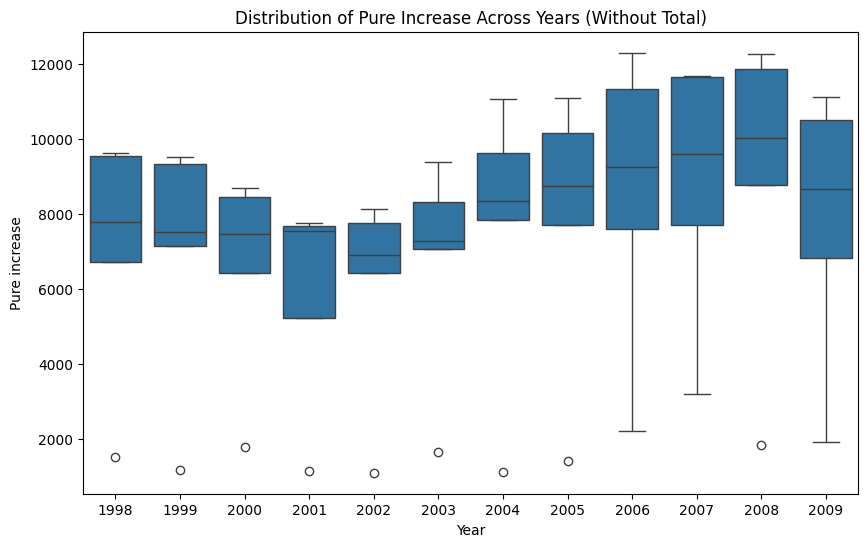

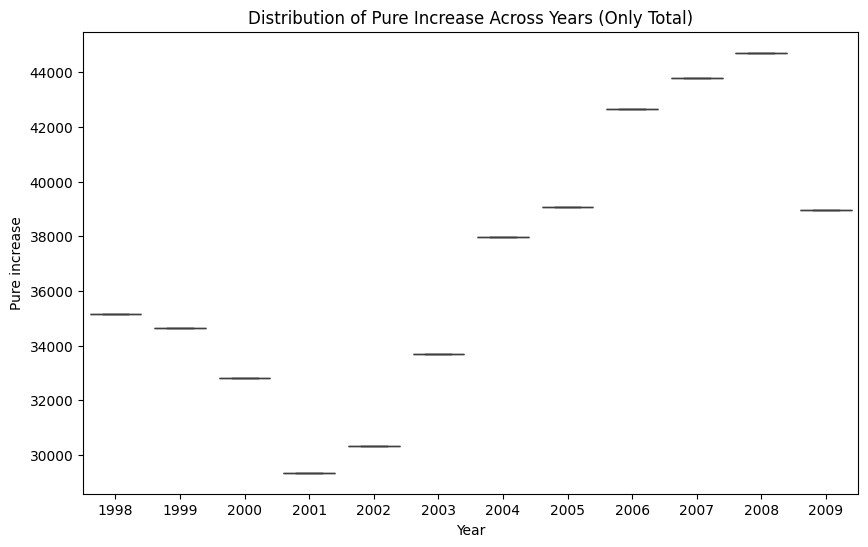

In [34]:
import seaborn as sns
# Without 'Total'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Pure increase', data=df_without_total)
plt.title('Distribution of Pure Increase Across Years (Without Total)')
plt.show()

# Only 'Total'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Pure increase', data=df_only_total)
plt.title('Distribution of Pure Increase Across Years (Only Total)')
plt.show()


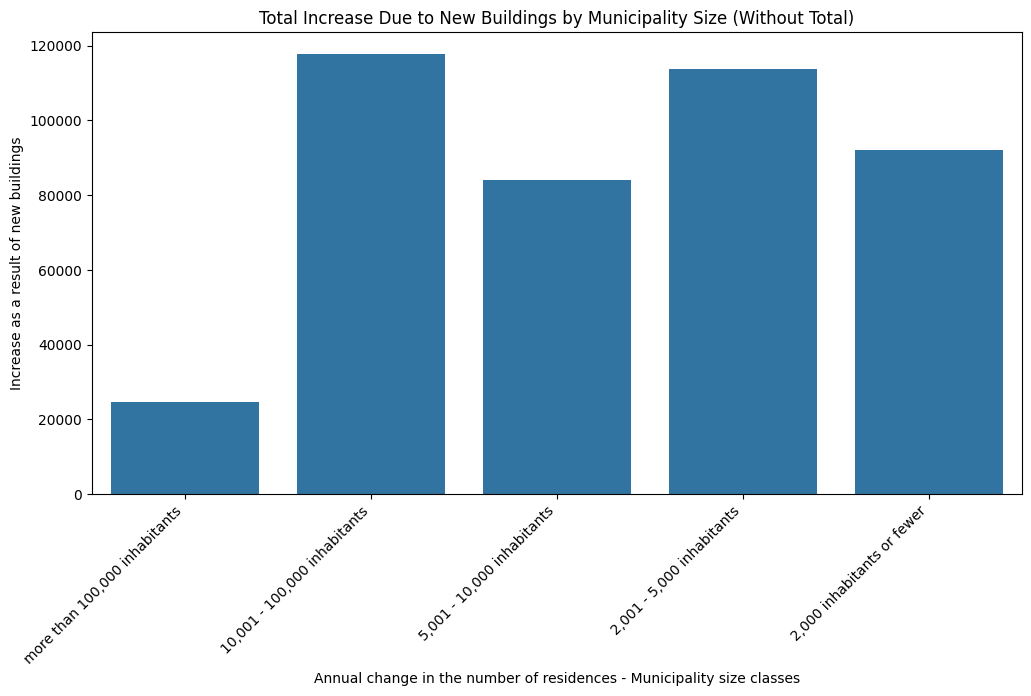

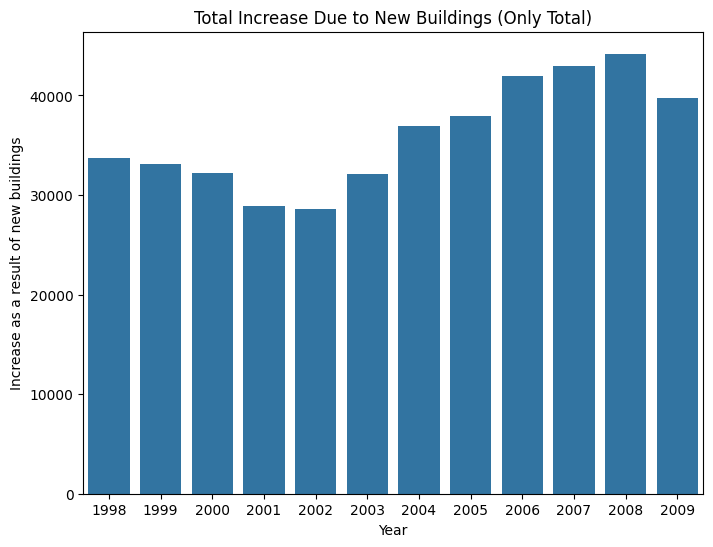

In [35]:
# Without 'Total'
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Annual change in the number of residences - Municipality size classes',
    y='Increase as a result of new buildings',
    data=df_without_total,
    estimator=sum,
    ci=None
)
plt.xticks(rotation=45, ha='right')
plt.title('Total Increase Due to New Buildings by Municipality Size (Without Total)')
plt.show()

# Only 'Total'
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Year',
    y='Increase as a result of new buildings',
    data=df_only_total,
    estimator=sum,
    ci=None
)
plt.title('Total Increase Due to New Buildings (Only Total)')
plt.show()


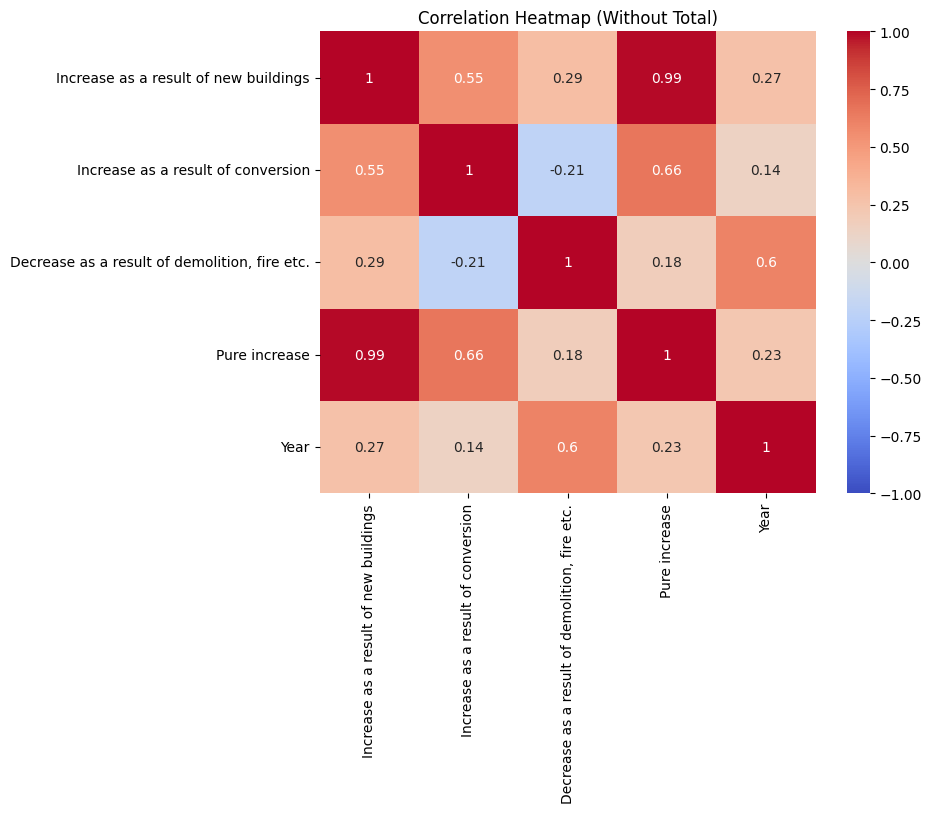

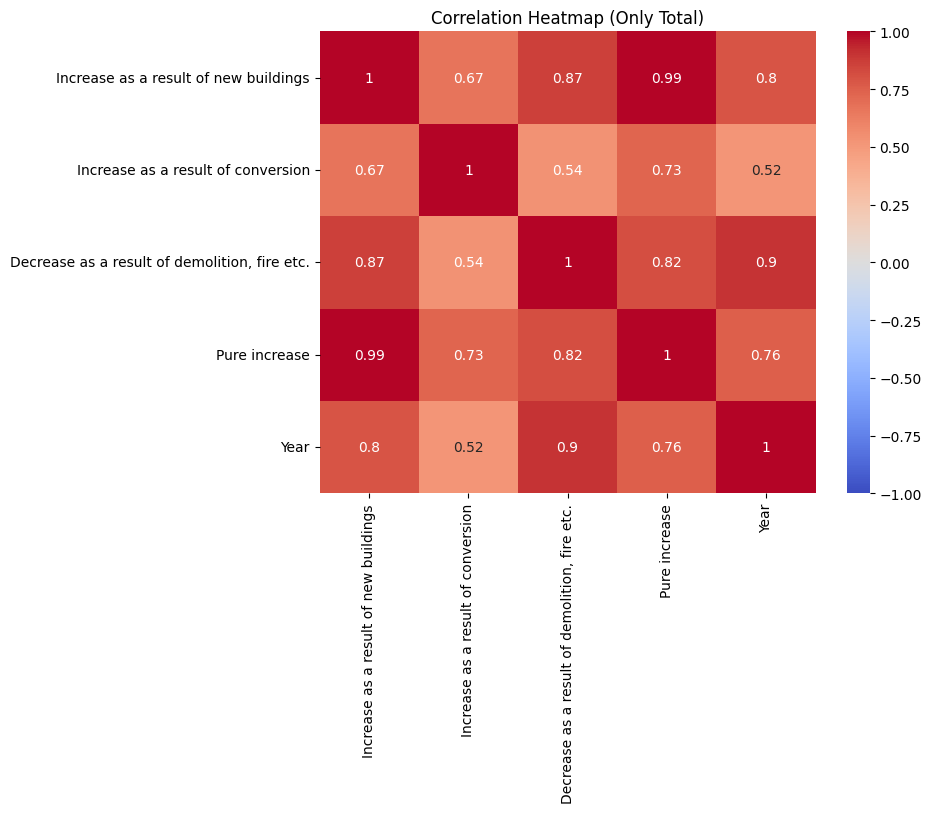

In [36]:
# Without 'Total'
plt.figure(figsize=(8, 6))
sns.heatmap(df_without_total.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Without Total)')
plt.show()

# Only 'Total'
plt.figure(figsize=(8, 6))
sns.heatmap(df_only_total.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Only Total)')
plt.show()


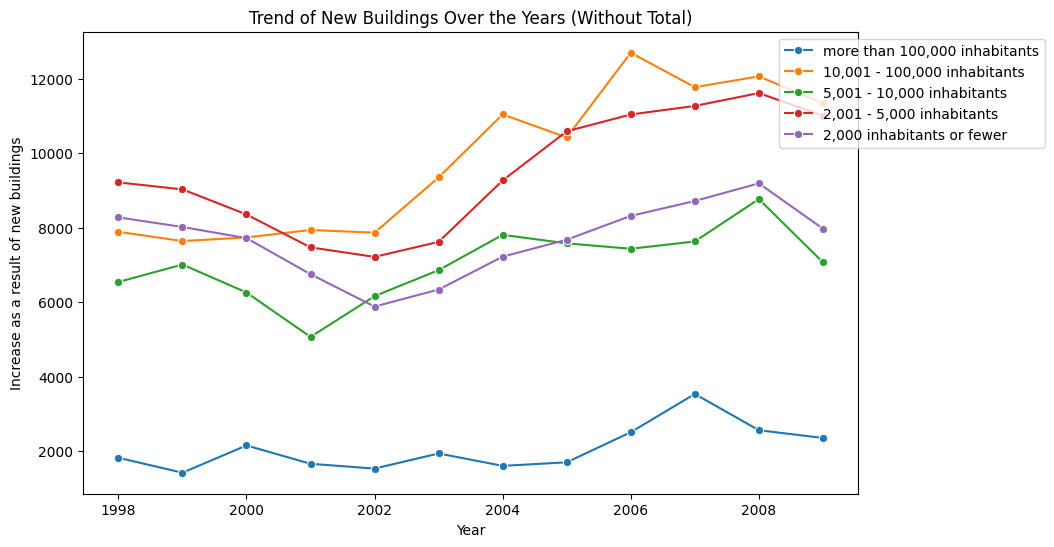

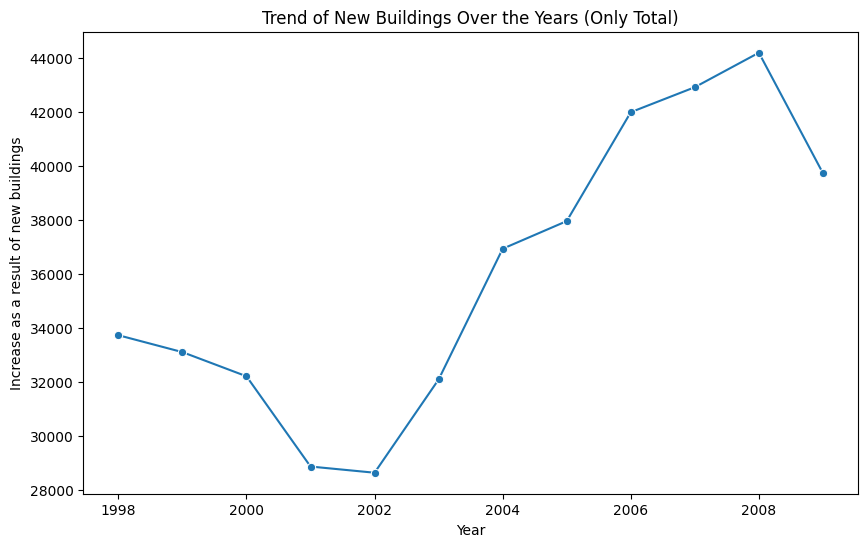

In [37]:
# Without 'Total'
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year', y='Increase as a result of new buildings', 
    hue='Annual change in the number of residences - Municipality size classes', 
    data=df_without_total, marker='o'
)
plt.title('Trend of New Buildings Over the Years (Without Total)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Only 'Total'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Increase as a result of new buildings', data=df_only_total, marker='o')
plt.title('Trend of New Buildings Over the Years (Only Total)')
plt.show()


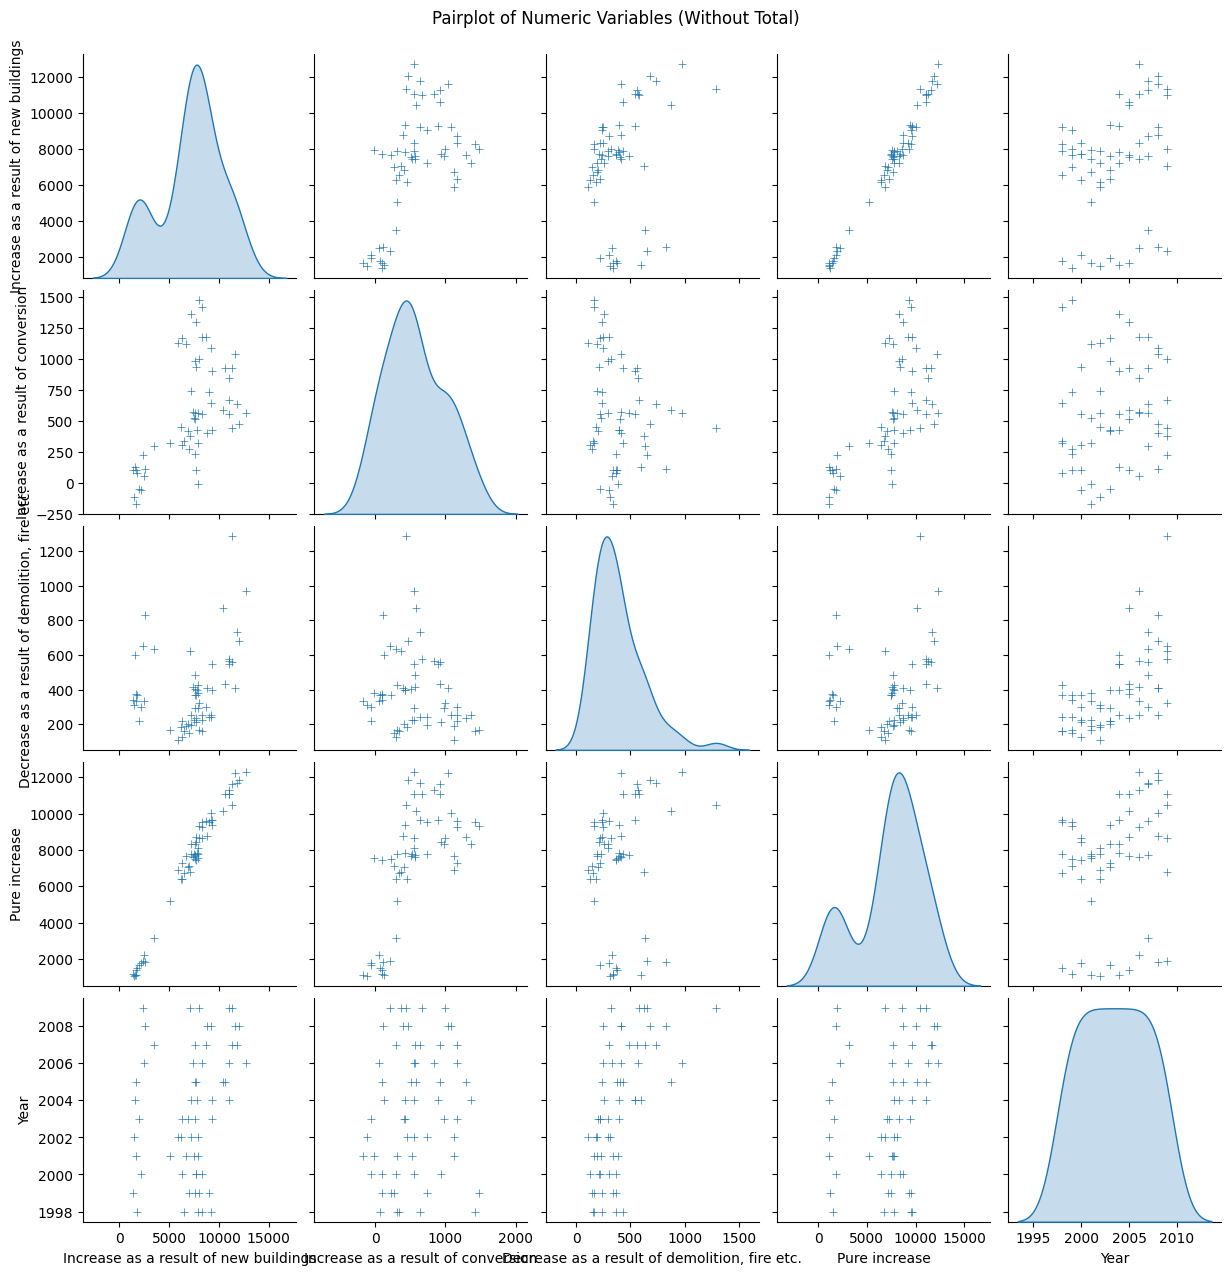

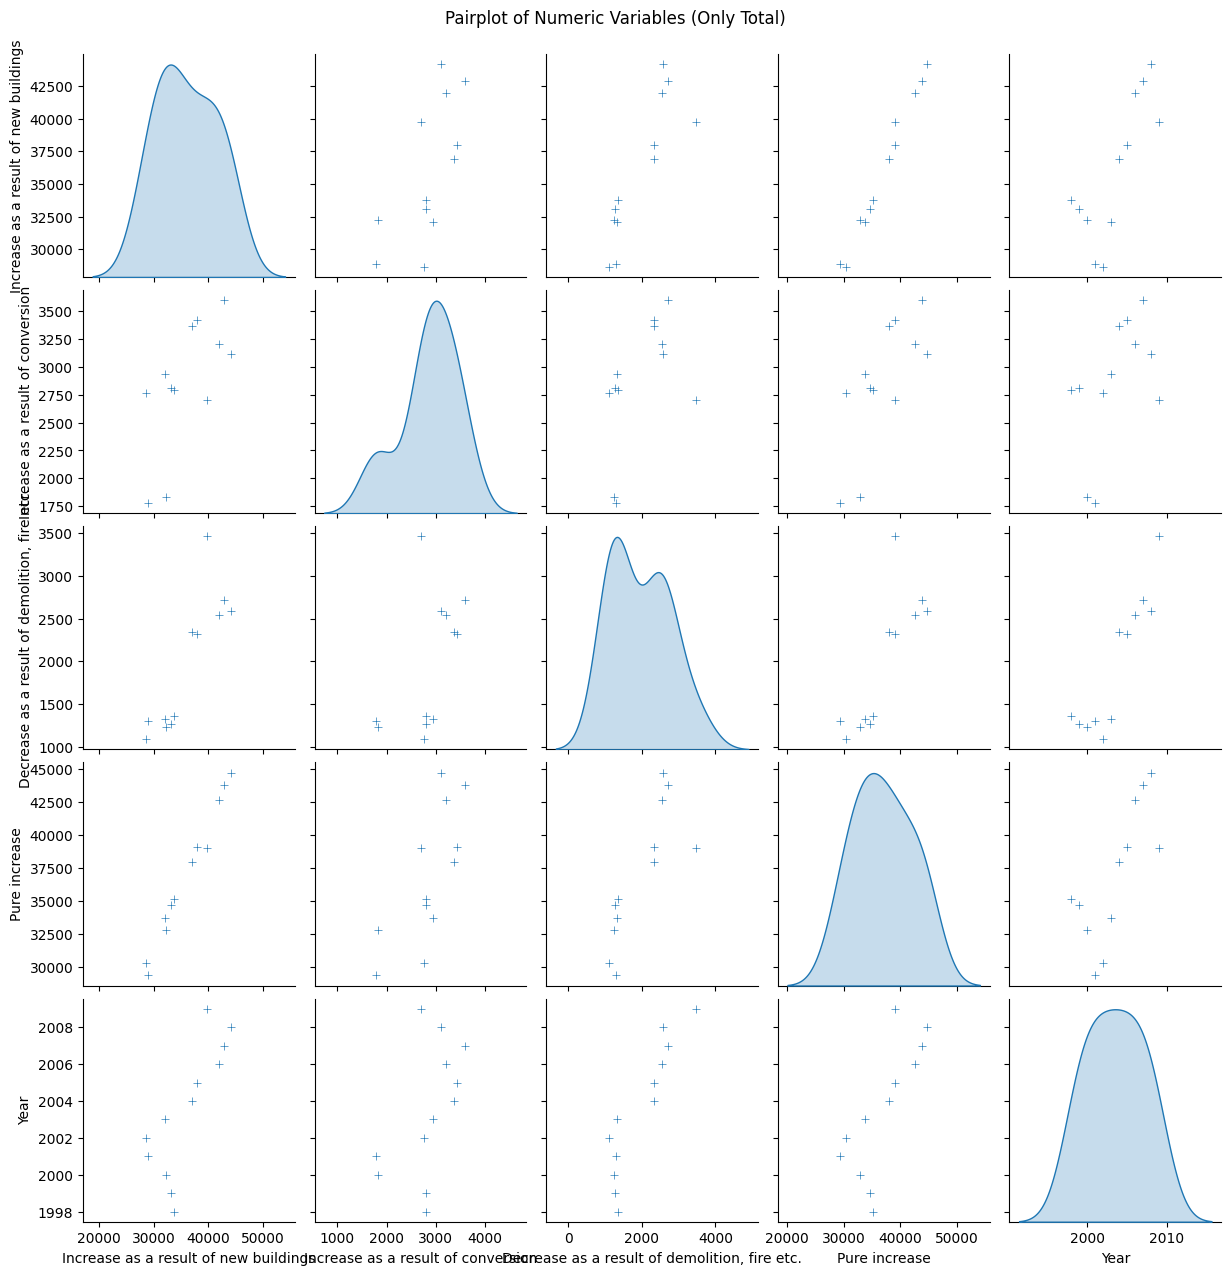

In [38]:
# Without 'Total'
sns.pairplot(df_without_total, diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Numeric Variables (Without Total)', y=1.02)
plt.show()

# Only 'Total'
sns.pairplot(df_only_total, diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Numeric Variables (Only Total)', y=1.02)
plt.show()


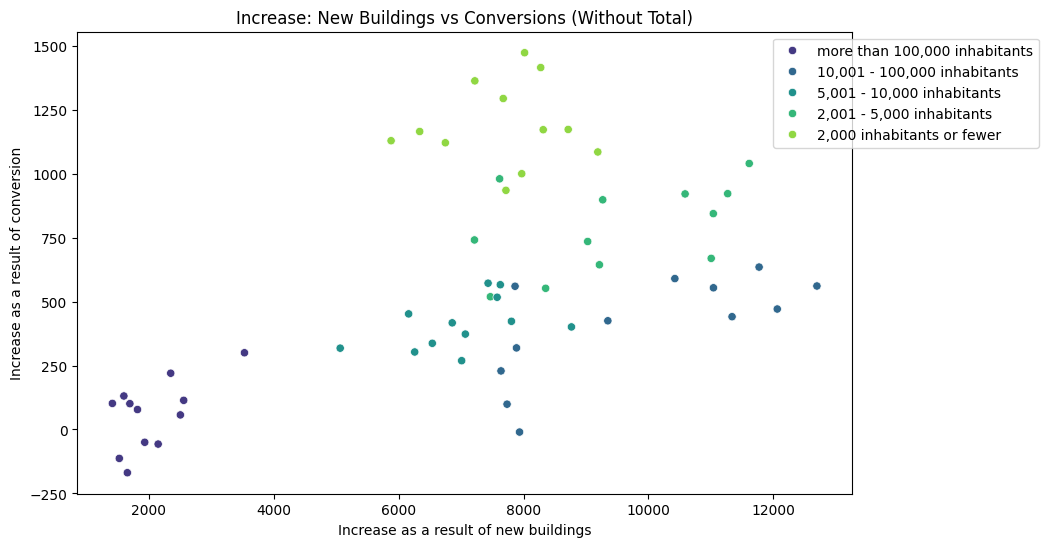

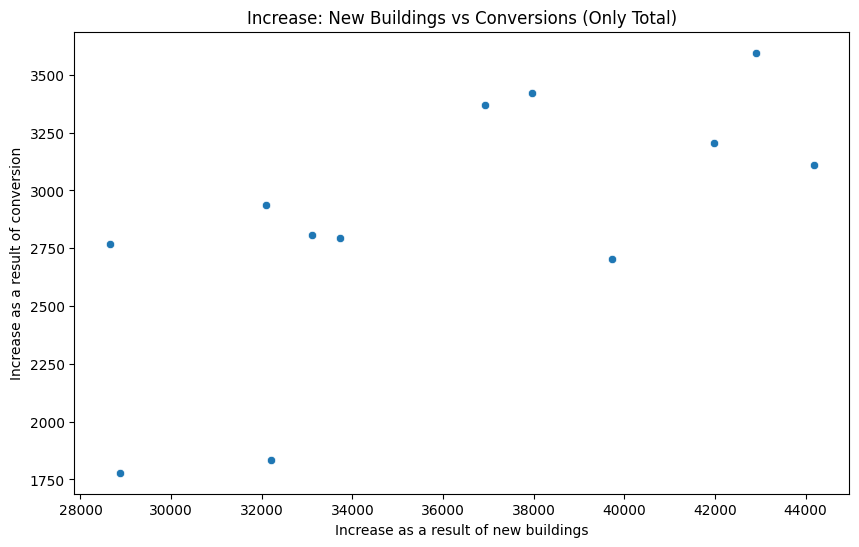

In [39]:
# Without 'Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_without_total, 
    x='Increase as a result of new buildings', 
    y='Increase as a result of conversion', 
    hue='Annual change in the number of residences - Municipality size classes', 
    palette='viridis'
)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Increase: New Buildings vs Conversions (Without Total)')
plt.show()

# Only 'Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_only_total, 
    x='Increase as a result of new buildings', 
    y='Increase as a result of conversion'
)
plt.title('Increase: New Buildings vs Conversions (Only Total)')
plt.show()


In [40]:
# Rename columns for easier access
df_without_total.columns = ['Municipality_Size', 'Increase_New_Buildings', 'Increase_Conversion',
                            'Decrease_Demolition', 'Pure_Increase', 'Year']

# Convert numeric columns to appropriate data types
numeric_cols = ['Increase_New_Buildings', 'Increase_Conversion', 'Decrease_Demolition',
                'Pure_Increase', 'Year']

for col in numeric_cols:
    df_without_total[col] = pd.to_numeric(df_without_total[col], errors='coerce')

# Remove rows with missing values
df_without_total.dropna(inplace=True)

# Reset index after dropping rows
df_without_total.reset_index(drop=True, inplace=True)


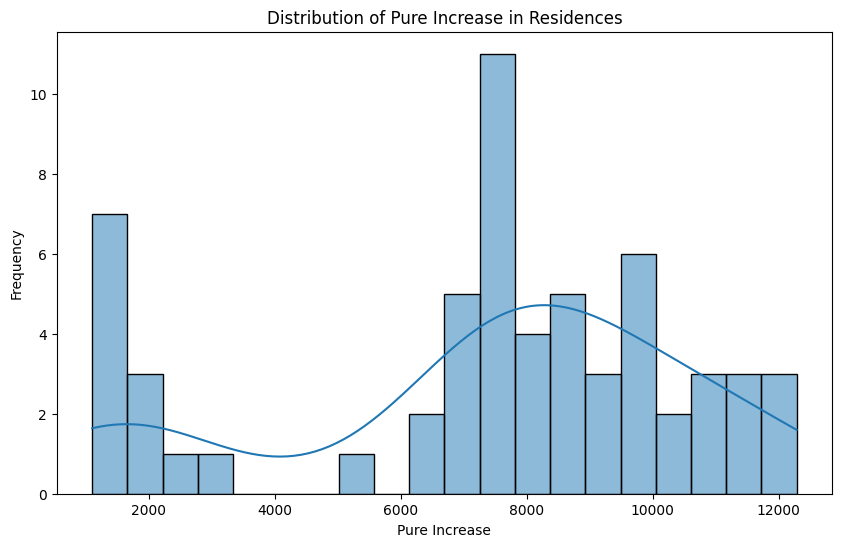

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_without_total['Pure_Increase'], bins=20, kde=True)
plt.title('Distribution of Pure Increase in Residences')
plt.xlabel('Pure Increase')
plt.ylabel('Frequency')
plt.show()


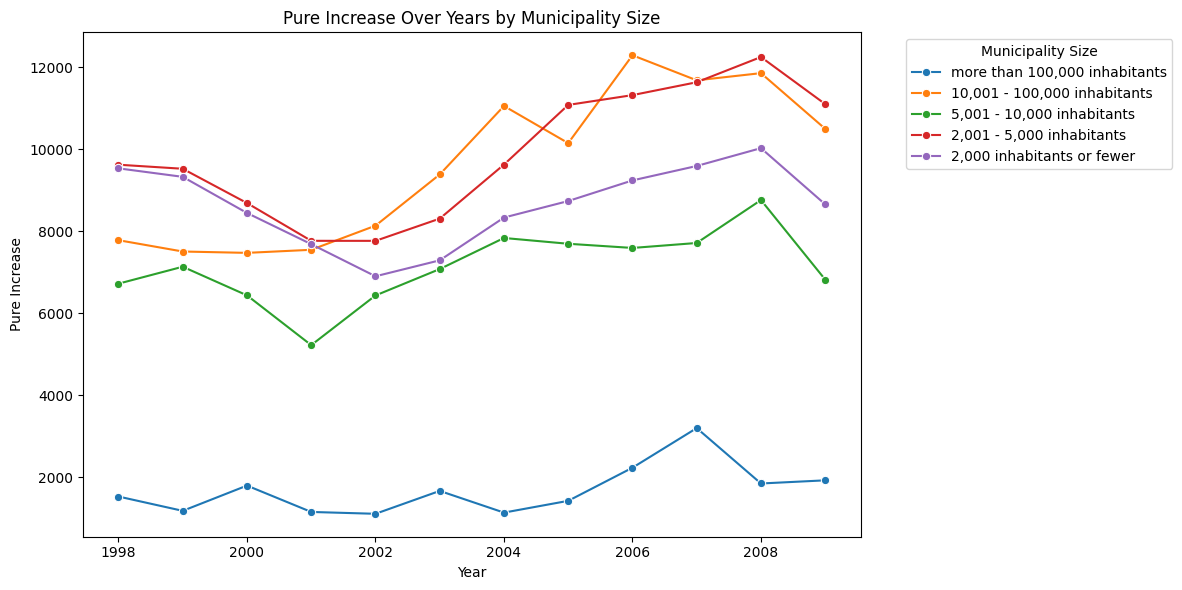

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_without_total, x='Year', y='Pure_Increase', hue='Municipality_Size', marker='o')
plt.title('Pure Increase Over Years by Municipality Size')
plt.xlabel('Year')
plt.ylabel('Pure Increase')
plt.legend(title='Municipality Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


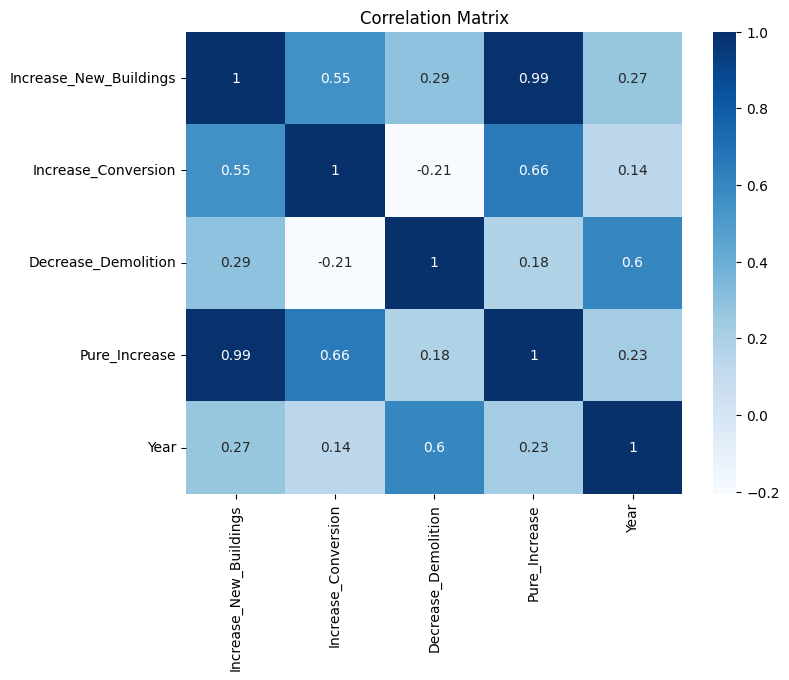

In [43]:
# Compute the correlation matrix
corr_matrix = df_without_total[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


In [45]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Encode 'Municipality_Size' using Label Encoding
le = LabelEncoder()
df_without_total['Municipality_Size_Encoded'] = le.fit_transform(df_without_total['Municipality_Size'])


In [48]:
# Define feature matrix X and target vector y
X = df_without_total[['Increase_New_Buildings', 'Increase_Conversion', 'Decrease_Demolition',
                      'Year', 'Municipality_Size_Encoded']]
y = df_without_total['Pure_Increase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")


Linear Regression Performance:
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R-squared: 1.00


In [50]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")




Decision Tree Regressor Performance:
Mean Absolute Error: 553.25
Mean Squared Error: 562474.92
R-squared: 0.96


In [51]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")



Random Forest Regressor Performance:
Mean Absolute Error: 493.84
Mean Squared Error: 337095.67
R-squared: 0.98


In [52]:
# Create a DataFrame to compare model performance
performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R-squared': [r2_lr, r2_dt, r2_rf]
})

performance


,Model,MAE,MSE,R-squared
0,Linear Regression,3.600083e-13,4.351315e-25,1.000000
1,Decision Tree,5.532500e+02,5.624749e+05,0.961904
2,Random Forest,4.938358e+02,3.370957e+05,0.977169


In [53]:
# Check for overlapping indices between training and test sets
overlap = X_train.index.intersection(X_test.index)
print(f"Number of overlapping samples: {len(overlap)}")


Number of overlapping samples: 0


In [54]:
# Coefficients of the Linear Regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

coefficients


,Feature,Coefficient
0,Increase_New_Buildings,1.000000e+00
1,Increase_Conversion,1.000000e+00
2,Decrease_Demolition,-1.000000e+00
3,Year,-4.932253e-15
4,Municipality_Size_Encoded,6.641606e-14


In [56]:
# Compute Pure Increase manually
df_without_total['Pure_Increase_Calculated'] = (
    df_without_total['Increase_New_Buildings'] +
    df_without_total['Increase_Conversion'] -
    df_without_total['Decrease_Demolition']
)

# Check if the calculated Pure Increase matches the actual Pure Increase
difference = df_without_total['Pure_Increase'] - df_without_total['Pure_Increase_Calculated']

print(f"Maximum difference between actual and calculated Pure Increase: {difference.abs().max()}")


Maximum difference between actual and calculated Pure Increase: 0
